# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("C:\\Users\\makar\\mini-project-IV\\data\\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.shape

(614, 13)

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [10]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [12]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [13]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
approval_rate = df['Loan_Status'].value_counts(normalize=True)
approval_rate

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



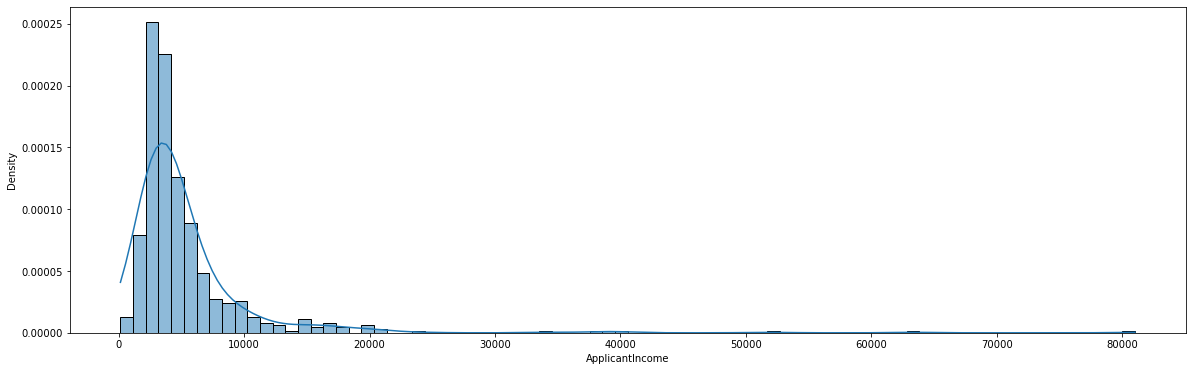

In [22]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['ApplicantIncome'],kde=True, stat="density", bins=80, linewidth=1)
plt.show()


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

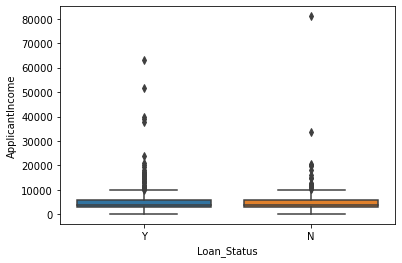

In [23]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status', data=df)

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

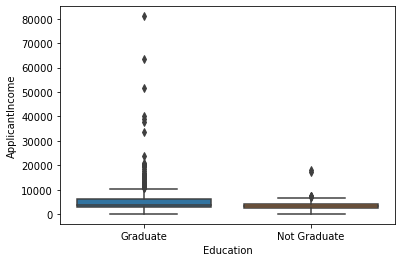

In [24]:
sns.boxplot(y='ApplicantIncome',x='Education', data=df)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

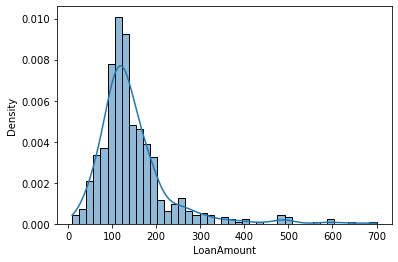

In [25]:
sns.histplot(df['LoanAmount'], kde=True, stat="density", linewidth=1)

<AxesSubplot:ylabel='LoanAmount'>

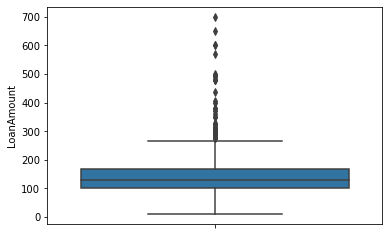

In [26]:
sns.boxplot(y='LoanAmount', data=df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [27]:
loan_status_table = pd.pivot_table(df, index='Loan_Status', aggfunc='mean')
loan_status_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Loan_Status,,,,,
N,5446.078125,1877.807292,0.541899,151.220994,344.064516
Y,5384.068720,1504.516398,0.981818,144.294404,341.072464


In [28]:
gender_table = pd.pivot_table(df, index='Gender')
gender_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Gender,,,,,
Female,4643.473214,1108.008929,0.831683,126.697248,352.293578
Male,5446.460123,1742.932352,0.847007,149.265957,339.665272


In [29]:
married_table = pd.pivot_table(df, index='Married')
married_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Married,,,,,
No,4970.384977,1316.558685,0.839196,128.883495,351.115385
Yes,5629.173367,1794.632965,0.842541,155.750000,336.987147


In [30]:
education_table = pd.pivot_table(df, index='Education')
education_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Education,,,,,
Graduate,5857.433333,1717.474833,0.857788,154.060215,344.669492
Not Graduate,3777.283582,1276.544776,0.785124,118.409449,332.156250


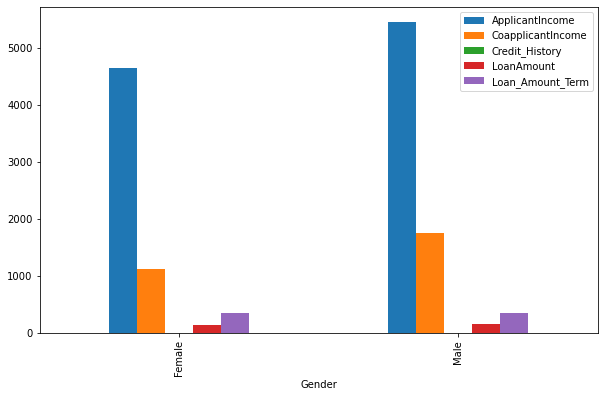

In [31]:
# Gender pivot_table visualization
plt.rcParams["figure.figsize"] = [10, 6]
gender_table.plot(kind='bar').legend(loc='upper right', prop={'size': 10})

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

In [32]:
# Using pipeline to impute missing values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [33]:
df['Loan_Amount_Term'].replace(0, df['Loan_Amount_Term'].mean())

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [34]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

### Before

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

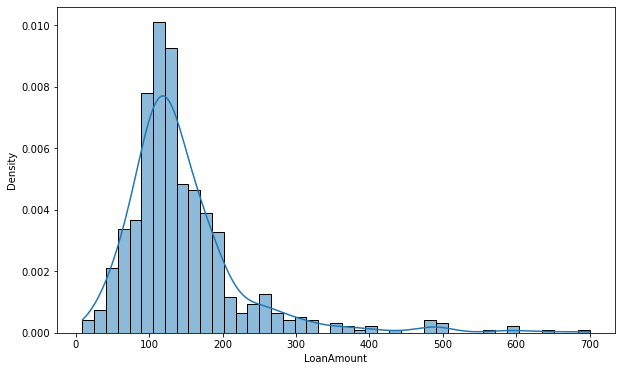

In [35]:
sns.histplot(df['LoanAmount'], kde=True, stat="density", linewidth=1)

In [36]:
df['LoanAmount'] = np.log(df['LoanAmount'])

### After 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

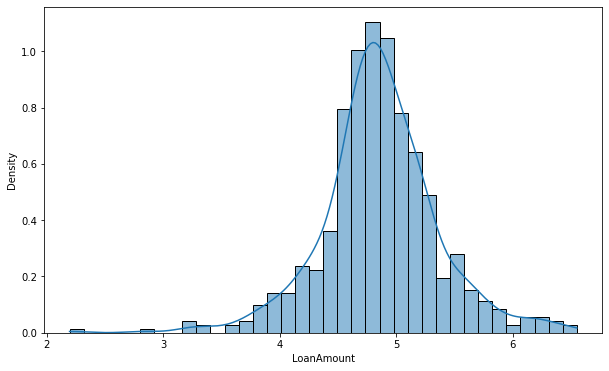

In [37]:
sns.histplot(df['LoanAmount'], kde=True, stat="density", linewidth=1)

Combine both incomes as total income and take a log transformation of the same.

In [38]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [39]:
df['Total_Income'] = np.log(df['Total_Income'])

In [40]:
df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
Total_Income        float64
dtype: object

In [41]:
# Creating target variable
y = df['Loan_Status']
df = df.drop(['Loan_ID', 'Loan_Status'],axis = 1)

In [42]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [43]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Total_Income         0
dtype: int64

In [44]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [45]:
pca = PCA(n_components=2)

In [46]:
select_k_best = SelectKBest(k=2)

In [47]:
#Building two separate pipelines for each type of features
imputer_numerical = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')
OHE = OneHotEncoder(sparse=False)

numeric_transformer = Pipeline(steps=[('impute_num', imputer_numerical), 
                                      ('scaling', StandardScaler()),
                                      ("select_k_best", select_k_best)])

categorical_transformer = Pipeline(steps=[('impute_cat', imputer_categorical),
                                          ('one_hot_encode', OHE),
                                          ("pca", pca)])

preprocessor = ColumnTransformer(transformers=[('numeric', numeric_transformer, num_feats),
                                  ('categorical', categorical_transformer, cat_feats)])

# feature_union = FeatureUnion([('pca', pca), 
#                               ('select_best', select_k_best)])

In [48]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute_num',
                                                  SimpleImputer()),
                                                 ('scaling', StandardScaler()),
                                                 ('select_k_best',
                                                  SelectKBest(k=2))]),
                                 ['LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History', 'Total_Income']),
                                ('categorical',
                                 Pipeline(steps=[('impute_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(sparse=False)),
                                                 ('pca', PCA(n_components=2))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Property_Area'])])

In [49]:
# Split the dataset into a train and test set
df_train = df.sample(frac=0.8).sort_index()
y_train = y[y.index.isin(df_train.index.tolist())]

In [50]:
df_test = df[~df.index.isin(df_train.index.tolist())].sort_index()
y_test = y[y.index.isin(df_test.index.tolist())]

## 4. Building a Predictive Model

In [51]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
clf = xgb.XGBClassifier()

In [52]:
pipe_lr = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', lr)])

pipe_rfc = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', rfc)])

pipe_dtc = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', dtc)])

pipe_gbc = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', gbc)])

pipe_xgb = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', clf)])

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
pipe_lr.fit(df_train, y_train)
pipe_rfc.fit(df_train, y_train)
pipe_dtc.fit(df_train, y_train)
pipe_gbc.fit(df_train, y_train)
pipe_xgb.fit(df_train, y_train)

print(pipe_lr.score(df_test, y_test))
print(pipe_rfc.score(df_test, y_test))
print(pipe_dtc.score(df_test, y_test))
print(pipe_gbc.score(df_test, y_test))
print(pipe_xgb.score(df_test, y_test))

[22:13:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8373983739837398
0.8455284552845529
0.7235772357723578
0.8536585365853658
0.8130081300813008


Try paramater grid search to improve the results

In [55]:
# Find the best hyperparameters using GridSearchCV on the train set
parameters = {'classifier__penalty': ['l2'],
              'classifier__C': [0.001,0.01,0.1,1,10,100,1000]}
grid = GridSearchCV(pipe_lr, parameters, scoring ='accuracy', cv=5, verbose=0)

grid.fit(df_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_

best_acc = grid.score(df_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8373983739837398
Achieved with hyperparameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}


              precision    recall  f1-score   support

           N       0.88      0.45      0.60        33
           Y       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



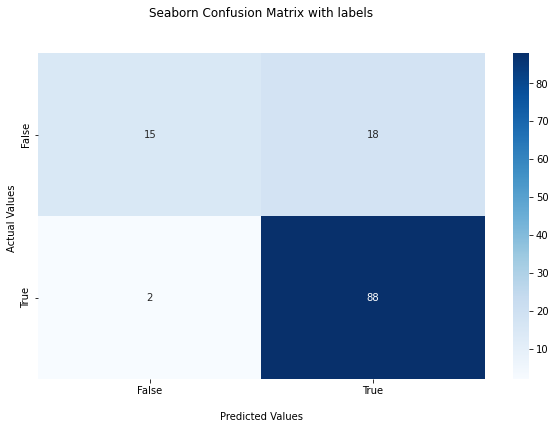

In [56]:
y_pred = pipe_lr.predict(df_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [56]:
from sklearn import set_config
set_config(display='diagram')

pipe_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('select_k_best',
                                                                   SelectKBest(k=2))]),
                                                  ['LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'Total_Income']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(sparse=False)),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', LogisticRegression())])

## 5. Deploy your model to cloud and test it with PostMan, BASH or Python

In [57]:
# saving the model
import pickle
 
pickle.dump(grid, open('log_reg.pkl', 'wb'))